In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Australia_Grocery_2022Sep.csv')
df.head()

,index,Postal_code,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,...,Retail_price,Product_Url,Brand,Sku,RunDate,unit_price,unit_price_unit,state,city,tid
0,0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,$6.50 per 1Kg,approx. 1.1kg,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,1491280P,2022-11-09 08:23:06,6.50,1Kg,NSW,TEMPE,29742568
1,1,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,$9.00 per 1Kg,approx. 600g,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,1718058P,2022-11-09 08:23:06,9.00,1Kg,NSW,TEMPE,29742569
2,2,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,$7.50 per 1Kg,approx. 600g,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,2565429P,2022-11-09 08:23:06,7.50,1Kg,NSW,TEMPE,29742570
3,3,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,$4.50 per 1Kg,approx. 750g each,1,...,4.13,https://shop.coles.com.au/a/alexandria/product...,Coles,3199541P,2022-11-09 08:23:06,4.50,1Kg,NSW,TEMPE,29742571
4,4,2044,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,$8.75 per 1Kg,1.2kg,0,...,11.00,https://shop.coles.com.au/a/alexandria/product...,Coles,2904193P,2022-11-09 08:23:06,8.75,1Kg,NSW,TEMPE,29742572


In [5]:
# for index, value in enumerate(sorted(set(df['city']))):
#     print(f'''<option value="{value}">{value}</option>''')

In [6]:
df.shape

(488640, 22)

In [7]:
df.duplicated().sum()

0

In [8]:
num_of_null_val = df['Price_per_unit'].isnull().sum()
print(f'Price_per_unit {num_of_null_val} --> {(num_of_null_val / 488640) * 100:.2f}%')

Price_per_unit 3142 --> 0.64%


In [9]:
df[df.columns].nunique()

index              488640
Postal_code            70
Category                6
Sub_category           27
Product_Group         221
Product_Name         7193
Package_price        1089
Price_per_unit       2749
package_size          669
is_estimated            2
is_special              2
in_stock                1
Retail_price          609
Product_Url        415377
Brand                1089
Sku                  8092
RunDate                 1
unit_price           1731
unit_price_unit        14
state                   8
city                   74
tid                488640
dtype: int64

In [10]:
df['Retail_price'].isnull().sum()

351687

In [11]:
df.drop(columns=['index', 'Postal_code', 'Price_per_unit', 'is_estimated', 'is_special', 'in_stock', 'Retail_price', 'Product_Url', 'Sku', 'RunDate', 'unit_price', 'unit_price_unit', 'tid'], inplace=True)

In [12]:
df.dropna(inplace=True)
df.shape

(486542, 9)

In [13]:
df.head()

,Category,Sub_category,Product_Group,Product_Name,Package_price,package_size,Brand,state,city
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,approx. 1.1kg,Coles,NSW,TEMPE
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,approx. 600g,Coles,NSW,TEMPE
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,approx. 600g,Coles,NSW,TEMPE
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,approx. 750g each,Coles,NSW,TEMPE
4,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,1.2kg,Coles,NSW,TEMPE


In [14]:
df[df.columns].dtypes

Category          object
Sub_category      object
Product_Group     object
Product_Name      object
Package_price    float64
package_size      object
Brand             object
state             object
city              object
dtype: object

In [15]:
# def price_per_unit_in_1kg_1l_1ea(value):
#     if isinstance(value, str):
#         value = value.split()
#         if value[2].lower() == '1kg' or value[2].lower() == '1l' or value[2].lower() == '1ea' or value[2].lower() == '1kgm':
#             return float(value[0][1:])
#         elif value[2].lower() == '100g' or value[2].lower() == '100ml':
#             return float(value[0][1:]) * 10
#         elif value[2].lower() == '10g' or value[2].lower() == '10ml':
#             return float(value[0][1:]) * 100
#         elif value[2].lower() == '1g':
#             return float(value[0][1:]) * 1000
#         elif value[2].lower() == '100kg':
#             return float(value[0][1:]) / 100
#         elif value[2].lower() == '10kg':
#             return float(value[0][1:]) / 10
#         elif value[0] == '$0.00':
#             return None
#     return None


# df['price_per_unit_in_1kg/1l/1ea'] = df['Price_per_unit'].apply(price_per_unit_in_1kg_1l_1ea)
# df.head()

In [16]:
# df[~df['Price_per_unit'].str.split().str[2].isin(['1Kg', '1L', '1Ea', '100G', '1kg'])].head(35)

In [17]:
# num_of_null_val = df['price_per_unit_in_1kg/1l/1ea'].isnull().sum()
# print(f'price_per_unit_in_1kg/1l/1ea {num_of_null_val} --> {(num_of_null_val / 488640) * 100:.2f}%')

In [18]:
def package_size_unit_in_1kg_1l_1ea(value):
    if isinstance(value, str):
        if 'mL' in value:
            return float(value.replace('mL', '')) / 1000
        
        value = value.lower().replace(' ', '')
        if value in ['1bunch', '1each', '1pack', '1kg', '1l', 'apprx.1kg', 'perkg']:
            return 1.0
        
        if 'approx.' in value:
            value = value.replace('approx.', '')
        elif 'approx' in value:
            value = value.replace('approx', '')
        
        num = ''
        for char in value:
            if char.isdigit() or char == '.':
                num += char
            else:
                break
         
        if num:   
            if 'kg' in value or 'l' in value:
                return float(num)
            elif 'g' in value or 'gram' in value:
                return float(num) / 1000
            elif 'pack' in value or 'each' in value:
                return float(num)
    return None


df['package_size_unit_in_1kg/1l/1ea'] = df['package_size'].apply(package_size_unit_in_1kg_1l_1ea)
df.head()

,Category,Sub_category,Product_Group,Product_Name,Package_price,package_size,Brand,state,city,package_size_unit_in_1kg/1l/1ea
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,approx. 1.1kg,Coles,NSW,TEMPE,1.10
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,approx. 600g,Coles,NSW,TEMPE,0.60
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,approx. 600g,Coles,NSW,TEMPE,0.60
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,approx. 750g each,Coles,NSW,TEMPE,0.75
4,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,1.2kg,Coles,NSW,TEMPE,1.20


In [19]:
df.shape

(486542, 10)

In [20]:
df[df['package_size'].str.contains(r'\b(g|each|pack|l)\b', na=False, regex=True)].head(35)

C:\Users\SOHAM MAITY\AppData\Local\Temp\ipykernel_1832\1431603669.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['package_size'].str.contains(r'\b(g|each|pack|l)\b', na=False, regex=True)].head(35)


,Category,Sub_category,Product_Group,Product_Name,Package_price,package_size,Brand,state,city,package_size_unit_in_1kg/1l/1ea
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,approx. 750g each,Coles,NSW,TEMPE,0.750
37,Meat & seafood,Poultry,Whole chicken,RSPCA Approved Extra Large Whole Chicken,10.80,approx. 2.4kg each,Coles,NSW,TEMPE,2.400
38,Meat & seafood,Poultry,Whole chicken,RSPCA Approved Chicken Whole Boneless Herb & G...,9.35,approx. 850g each,Coles,NSW,TEMPE,0.850
39,Meat & seafood,Poultry,Whole chicken,Free Range RSPCA Approved Whole Chicken,17.60,approx 1.6kg each,Slow Hills,NSW,TEMPE,1.600
41,Meat & seafood,Poultry,Whole chicken,Whole Corn Fed Chicken,17.60,approx. 1.6kg pack,Game Farm,NSW,TEMPE,1.600
42,Meat & seafood,Poultry,Spatchcock & quail,Whole Spatchcock,8.33,approx. 450g pack,Game Farm,NSW,TEMPE,0.450
70,Meat & seafood,Beef & veal,Beef steaks,Beef Eye Fillet Roast,26.00,approx. 500g each,Coles,NSW,TEMPE,0.500
77,Meat & seafood,Beef & veal,Beef steaks,Graze Grassfed Beef Fillet Steak,20.46,approx. 330g each,Coles,NSW,TEMPE,0.330
98,Meat & seafood,Beef & veal,Graze beef,Graze Grassfed Beef Fillet Steak,20.46,approx. 330g each,Coles,NSW,TEMPE,0.330
99,Meat & seafood,Beef & veal,Graze beef,Beef Graze Grass Fed Roast Slow Cook,14.30,approx. 650g each,Coles,NSW,TEMPE,0.650


In [21]:
df[df['package_size'].str.contains('L', na=False, regex=True)].head()

,Category,Sub_category,Product_Group,Product_Name,Package_price,package_size,Brand,state,city,package_size_unit_in_1kg/1l/1ea
689,"Dairy, eggs & fridge",Milk,Skim & low fat milk,High Protein Light Milk,2.9,1L,The Complete Dairy,NSW,TEMPE,1.0
690,"Dairy, eggs & fridge",Milk,Skim & low fat milk,Lite Reduced Fat Milk,4.5,3L,Coles,NSW,TEMPE,3.0
691,"Dairy, eggs & fridge",Milk,Skim & low fat milk,Lite Reduced Fat Milk,3.1,2L,Coles,NSW,TEMPE,2.0
692,"Dairy, eggs & fridge",Milk,Skim & low fat milk,Skim Milk Bottle,1.6,1L,Coles,NSW,TEMPE,1.0
693,"Dairy, eggs & fridge",Milk,Skim & low fat milk,Lite Milk Bottle,1.6,1L,Coles,NSW,TEMPE,1.0


In [22]:
df[df['package_size'].str.contains('ml', case=False, na=False)].head()

,Category,Sub_category,Product_Group,Product_Name,Package_price,package_size,Brand,state,city,package_size_unit_in_1kg/1l/1ea
719,"Dairy, eggs & fridge",Milk,Specialty milk,Buttermilk,2.75,600mL,Dairy Farmers,NSW,TEMPE,0.600
742,"Dairy, eggs & fridge",Milk,Probiotic milk,Gluten Free Fermented Milk Drink 10 pack,7.70,65mL,Yakult,NSW,TEMPE,0.065
743,"Dairy, eggs & fridge",Milk,Probiotic milk,Fermented Light Probiotic Milk 5 Pack,4.00,65mL,Yakult,NSW,TEMPE,0.065
744,"Dairy, eggs & fridge",Milk,Probiotic milk,Pro-B Milk Drink Fermented,3.35,305mL,Coles,NSW,TEMPE,0.305
745,"Dairy, eggs & fridge",Milk,Probiotic milk,Fermented Probiotic Milk 5 pack,4.00,65mL,Yakult,NSW,TEMPE,0.065


In [23]:
df.drop('package_size', axis=1, inplace=True)
df['items_MRP'] = df.pop('Package_price')
df.head()

,Category,Sub_category,Product_Group,Product_Name,Brand,state,city,package_size_unit_in_1kg/1l/1ea,items_MRP
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,Coles,NSW,TEMPE,1.10,7.15
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,Coles,NSW,TEMPE,0.60,5.40
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,Coles,NSW,TEMPE,0.60,4.50
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,Coles,NSW,TEMPE,0.75,3.38
4,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,Coles,NSW,TEMPE,1.20,10.50


In [24]:
df.isnull().sum()

Category                           0
Sub_category                       0
Product_Group                      0
Product_Name                       0
Brand                              0
state                              0
city                               0
package_size_unit_in_1kg/1l/1ea    6
items_MRP                          0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

Category                           0
Sub_category                       0
Product_Group                      0
Product_Name                       0
Brand                              0
state                              0
city                               0
package_size_unit_in_1kg/1l/1ea    0
items_MRP                          0
dtype: int64

In [27]:
df.dtypes

Category                            object
Sub_category                        object
Product_Group                       object
Product_Name                        object
Brand                               object
state                               object
city                                object
package_size_unit_in_1kg/1l/1ea    float64
items_MRP                          float64
dtype: object

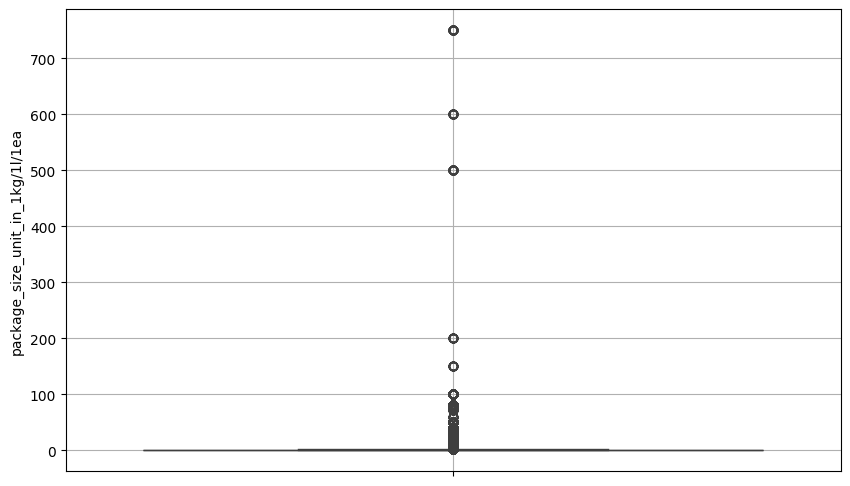

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['package_size_unit_in_1kg/1l/1ea'])
plt.grid(True)
plt.show()

In [29]:
data = df['package_size_unit_in_1kg/1l/1ea']
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR
outlier_data = (data < LowerBound) | (data > UpperBound)
print(f'package_size_unit_in_1kg/1l/1ea : {outlier_data.sum()} --> {(outlier_data.sum() / 486536) * 100:.2f}%')

package_size_unit_in_1kg/1l/1ea : 68679 --> 14.12%


<Figure size 800x600 with 0 Axes>

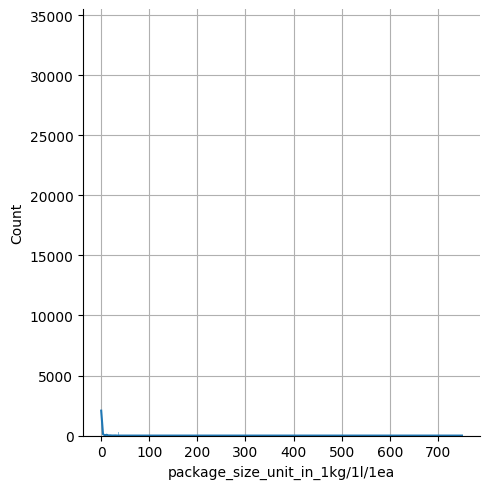

In [30]:
plt.figure(figsize=(8, 6))
sns.displot(data=df['package_size_unit_in_1kg/1l/1ea'], kde=True)
plt.grid(True)
plt.show()

In [31]:
df['package_size_unit_in_1kg/1l/1ea'].skew()

27.224909614965362

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head()

,Category,Sub_category,Product_Group,Product_Name,Brand,state,city,package_size_unit_in_1kg/1l/1ea,items_MRP
0,4,19,39,5319,195,1,66,1.10,7.15
1,4,19,39,5314,195,1,66,0.60,5.40
2,4,19,39,5309,195,1,66,0.60,4.50
3,4,19,39,5307,195,1,66,0.75,3.38
4,4,19,60,5358,195,1,66,1.20,10.50


In [33]:
df.shape

(486536, 9)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.iloc[:, :8]
Y = df.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [35]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=101)
rfr.fit(X_train, Y_train)

Y_pred_train = rfr.predict(X_train)
Y_pred_test = rfr.predict(X_test)

r2_score_train = r2_score(Y_train, Y_pred_train)
r2_score_test = r2_score(Y_test, Y_pred_test)

n = 486536
p = 9

adjusted_r2_score_train = 1 - (((1 - r2_score_train) * (n - 1)) / (n - p - 1))
adjusted_r2_score_test = 1 - (((1 - r2_score_test) * (n - 1)) / (n - p - 1))

print('-- Train Data --')
print('R2-Score Accuracy :', r2_score_train)
print('Adjusted R2-Score Accuracy :', adjusted_r2_score_train)

print('\n-- Test Data --')
print('R2-Score Accuracy :', r2_score_test)
print('Adjusted R2-Score Accuracy :', adjusted_r2_score_test)

-- Train Data --
R2-Score Accuracy : 0.9992239669552065
Adjusted R2-Score Accuracy : 0.9992239525997612

-- Test Data --
R2-Score Accuracy : 0.9973884664800322
Adjusted R2-Score Accuracy : 0.9973884181705859


In [36]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(random_state=101)
xgbr.fit(X_train, Y_train)

Y_pred_train = xgbr.predict(X_train)
Y_pred_test = xgbr.predict(X_test)

r2_score_train = r2_score(Y_train, Y_pred_train)
r2_score_test = r2_score(Y_test, Y_pred_test)

n = 486536
p = 9

adjusted_r2_score_train = 1 - (((1 - r2_score_train) * (n - 1)) / (n - p - 1))
adjusted_r2_score_test = 1 - (((1 - r2_score_test) * (n - 1)) / (n - p - 1))

print('-- Train Data --')
print('R2-Score Accuracy :', r2_score_train)
print('Adjusted R2-Score Accuracy :', adjusted_r2_score_train)

print('\n-- Test Data --')
print('R2-Score Accuracy :', r2_score_test)
print('Adjusted R2-Score Accuracy :', adjusted_r2_score_test)

-- Train Data --
R2-Score Accuracy : 0.957428766276246
Adjusted R2-Score Accuracy : 0.9574279787723848

-- Test Data --
R2-Score Accuracy : 0.9544672445239208
Adjusted R2-Score Accuracy : 0.954466402236357


In [37]:
from xgboost import XGBRFRegressor

xgbrfr = XGBRFRegressor(random_state=101)
xgbrfr.fit(X_train, Y_train)

Y_pred_train = xgbrfr.predict(X_train)
Y_pred_test = xgbrfr.predict(X_test)

r2_score_train = r2_score(Y_train, Y_pred_train)
r2_score_test = r2_score(Y_test, Y_pred_test)

n = 486536
p = 9

adjusted_r2_score_train = 1 - (((1 - r2_score_train) * (n - 1)) / (n - p - 1))
adjusted_r2_score_test = 1 - (((1 - r2_score_test) * (n - 1)) / (n - p - 1))

print('-- Train Data --')
print('R2-Score Accuracy :', r2_score_train)
print('Adjusted R2-Score Accuracy :', adjusted_r2_score_train)

print('\n-- Test Data --')
print('R2-Score Accuracy :', r2_score_test)
print('Adjusted R2-Score Accuracy :', adjusted_r2_score_test)

-- Train Data --
R2-Score Accuracy : 0.4831629944339032
Adjusted R2-Score Accuracy : 0.4831534337258422

-- Test Data --
R2-Score Accuracy : 0.4827170655114825
Adjusted R2-Score Accuracy : 0.4827074965544065


In [38]:
import pickle

with open('GroceryItemPrice_Predictor.pkl', 'wb') as file:
    pickle.dump(rfr, file)
    
with open('GroceryItemPrice_Predictor.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
print('Accuracy of the loaded model :', loaded_model.score(X_test, Y_test))

Accuracy of the loaded model : 0.9973884664800322
